In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
accelerometer = pd.read_csv('femaleWalk.csv')  

In [3]:
accelerometer

,accdatax,accdatay,accdataz,magdatax,magdatay,magdataz,gyrodatax,gyrodatay,gyrodataz,lightdatax
0,-3.1548176,0.445217,8.612317,-1.7690,-38.3690,-25.772501,0.069248,-0.154476,0.015980,1824.0
1,-3.1548176,0.445217,8.612317,1.1895,-42.5475,-25.772501,0.063921,-0.138495,0.029297,1824.0
2,-3.1548176,0.445217,8.612317,1.1895,-42.5475,-25.772501,0.045277,-0.098545,0.058594,1824.0
3,-3.3080106,0.847349,8.459125,1.1895,-42.5475,-25.772501,0.047941,-0.074574,0.069248,1824.0
4,-3.3080106,0.847349,8.459125,1.1895,-42.5475,-25.772501,0.037287,-0.031960,0.079901,1824.0
...,...,...,...,...,...,...,...,...,...,...
8317,-3.2409887,3.001625,7.836778,29.9815,-23.3630,-15.585500,0.221060,0.000000,0.005327,1068.0
8318,-3.2409887,3.001625,7.836778,26.9620,-26.3825,-19.184500,0.306288,0.013317,-0.010653,1068.0
8319,-3.2601378,2.676090,8.468699,26.9620,-26.3825,-19.184500,0.340912,0.010653,-0.026634,1068.0
8320,-3.2601378,2.676090,8.468699,26.9620,-26.3825,-19.184500,0.221060,-0.007990,-0.047941,1068.0


In [4]:
accelerometer[['accdatax', 'accdatay', 'accdataz']].head(10)

,accdatax,accdatay,accdataz
0,-3.1548176,0.445217,8.612317
1,-3.1548176,0.445217,8.612317
2,-3.1548176,0.445217,8.612317
3,-3.3080106,0.847349,8.459125
4,-3.3080106,0.847349,8.459125
5,-3.3080106,0.847349,8.459125
6,-3.3080106,0.847349,8.459125
7,-3.4324799,0.876072,8.181462
8,-3.4324799,0.876072,8.181462
9,-3.4324799,0.876072,8.181462


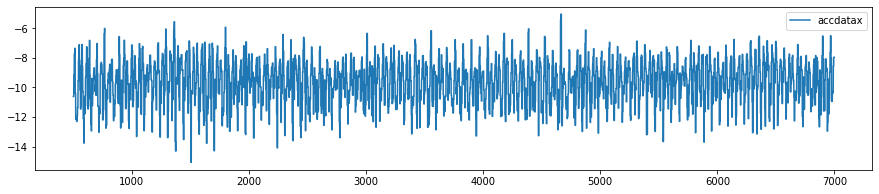

In [5]:
sampleX = pd.DataFrame(accelerometer['accdatax'].iloc[500:7000])
sampleX.astype(float).plot(figsize=(15,3))

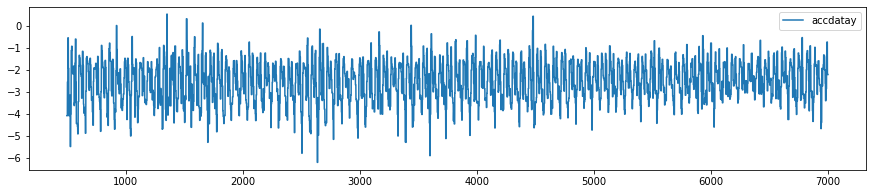

In [6]:
sampleY = pd.DataFrame(accelerometer['accdatay'].iloc[500:7000])
sampleY.astype(float).plot(figsize=(15,3))

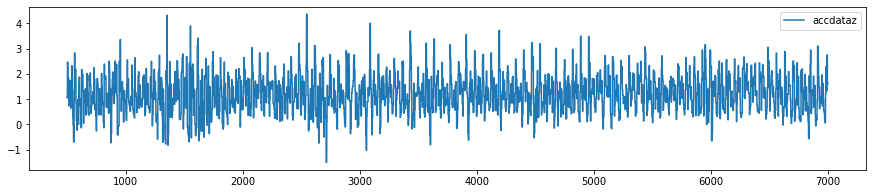

In [7]:
sampleZ = pd.DataFrame(accelerometer['accdataz'].iloc[500:7000])
sampleZ.astype(float).plot(figsize=(15,3))

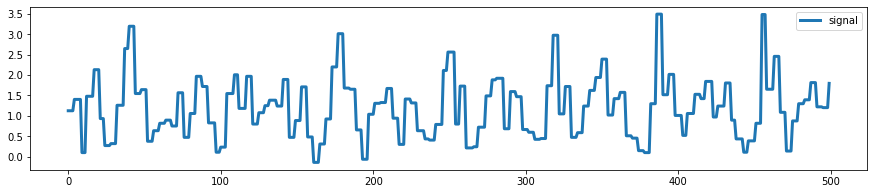

In [8]:
dataPreprocessing = pd.DataFrame(accelerometer['accdataz'].iloc[4500:5000])
dataPreprocessing.reset_index(drop=True, inplace=True)

ax = dataPreprocessing.astype(float).plot(figsize=(15,3),linewidth=3)
ax.legend(["signal"])

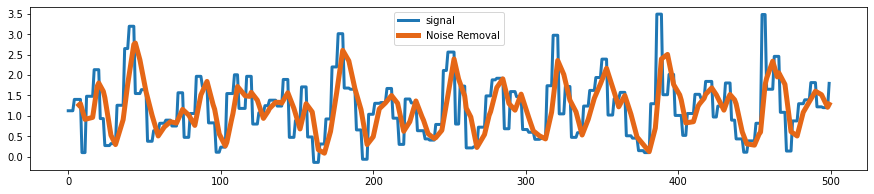

In [9]:
dataPreprocessing = pd.DataFrame(accelerometer['accdataz'].iloc[4500:5000])
dataPreprocessing.reset_index(drop=True, inplace=True)
ax = dataPreprocessing.astype(float).plot(figsize=(15,3),legend=False, linewidth=3)


# Tail-rolling average transform
rolling = dataPreprocessing.rolling(window=8)
rolling_mean = rolling.mean()
rolling_mean.plot(figsize=(15,3), ax=ax,legend=False,color = '#E56717',linewidth=5)
ax.legend(["signal", "Noise Removal"])



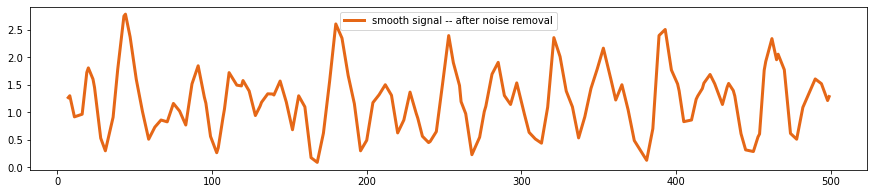

In [10]:
dataPreprocessing = pd.DataFrame(accelerometer['accdataz'].iloc[4500:5000])
dataPreprocessing.reset_index(drop=True, inplace=True)
dataPreprocessing.rename(columns={'accdataz': 'smooth signal -- after noise removal'}, inplace = True)


# Tail-rolling average transform
rolling = dataPreprocessing.rolling(window=8)
rolling_mean = rolling.mean()
rolling_mean.plot(figsize=(15,3), color = '#E56717',linewidth=3)


(-20.0, 5.0)

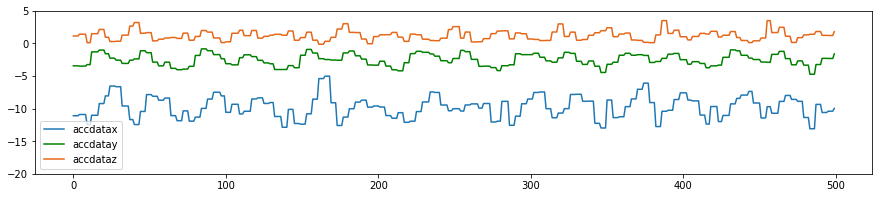

In [11]:
## 3D Signal of Accelerometer

## Feature Extraction

dataPreprocessingX = pd.DataFrame(accelerometer['accdatax'].iloc[4500:5000])
dataPreprocessingX.reset_index(drop=True, inplace=True)
ax = dataPreprocessingX.astype(float).plot(figsize=(15,3))

dataPreprocessingY = pd.DataFrame(accelerometer['accdatay'].iloc[4500:5000])
dataPreprocessingY.reset_index(drop=True, inplace=True)
dataPreprocessingY.astype(float).plot(figsize=(15,3), ax = ax, color = 'g')



dataPreprocessingZ = pd.DataFrame(accelerometer['accdataz'].iloc[4500:5000])
dataPreprocessingZ.reset_index(drop=True, inplace=True)
ax = dataPreprocessingZ.astype(float).plot(figsize=(15,3),ax = ax, color = '#E56717')
ax.set_ylim(-20,5)


(-20.0, 5.0)

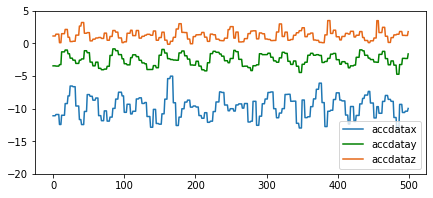

In [15]:
## Compact representation

dataPreprocessingX = pd.DataFrame(accelerometer['accdatax'].iloc[4500:5000])
dataPreprocessingX.reset_index(drop=True, inplace=True)
ax = dataPreprocessingX.astype(float).plot(figsize=(7,3))

dataPreprocessingY = pd.DataFrame(accelerometer['accdatay'].iloc[4500:5000])
dataPreprocessingY.reset_index(drop=True, inplace=True)
dataPreprocessingY.astype(float).plot(figsize=(7,3), ax = ax, color = 'g')



dataPreprocessingZ = pd.DataFrame(accelerometer['accdataz'].iloc[4500:5000])
dataPreprocessingZ.reset_index(drop=True, inplace=True)
ax = dataPreprocessingZ.astype(float).plot(figsize=(7,3),ax = ax, color = '#E56717')
ax.set_ylim(-20,5)

(-20.0, 5.0)

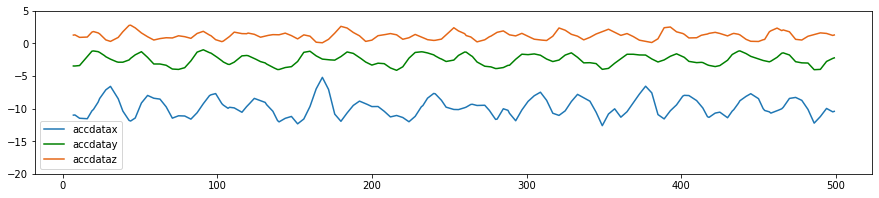

In [21]:
## Feature Extraction

dataPreprocessingX = pd.DataFrame(accelerometer['accdatax'].iloc[4500:5000])
dataPreprocessingX.reset_index(drop=True, inplace=True)
# Tail-rolling average transform
rollingX = dataPreprocessingX.rolling(window=8)
rolling_meanX = rollingX.mean()
ax = rolling_meanX.plot(figsize=(15,3))

dataPreprocessingY = pd.DataFrame(accelerometer['accdatay'].iloc[4500:5000])
dataPreprocessingY.reset_index(drop=True, inplace=True)
# Tail-rolling average transform
rollingY = dataPreprocessingY.rolling(window=8)
rolling_meanY = rollingY.mean()

rolling_meanY.plot(figsize=(15,3), ax = ax, color = 'g')



dataPreprocessingZ = pd.DataFrame(accelerometer['accdataz'].iloc[4500:5000])
dataPreprocessingZ.reset_index(drop=True, inplace=True)
# dataPreprocessingZ.rename(columns={'accdataz': 'smooth signal -- after noise removal'}, inplace = True)


# Tail-rolling average transform
rolling = dataPreprocessingZ.rolling(window=8)
rolling_mean = rolling.mean()

ax = rolling_mean.plot(figsize=(15,3),ax = ax, color = '#E56717')
ax.set_ylim(-20,5)



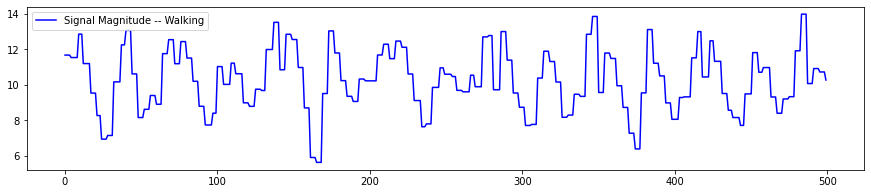

In [13]:
# magnitude = math.sqrt(dataPreprocessingX*dataPreprocessingX + dataPreprocessingY*dataPreprocessingY)
magnitude = ((pd.to_numeric(dataPreprocessingX['accdatax']) ** 2) + 
             (pd.to_numeric(dataPreprocessingY['accdatay']) ** 2) + 
             (pd.to_numeric(dataPreprocessingZ['accdataz']) ** 2))

magnitude = pd.to_numeric(magnitude)**0.5
magnitude = pd.DataFrame(magnitude)
magnitude.rename(columns={0: 'Signal Magnitude -- Walking'}, inplace = True)
magnitude.plot(figsize=(15,3) ,color = 'b')
# math.sqrt(magnitude[0])

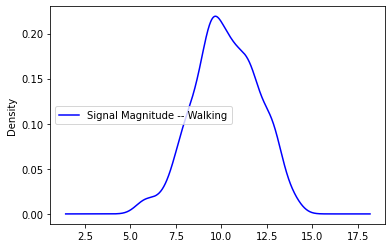

In [14]:
magnitude.plot.kde(color = 'b')

In [15]:
magnitude.mean()

Signal Magnitude -- Walking    10.246555
dtype: float64

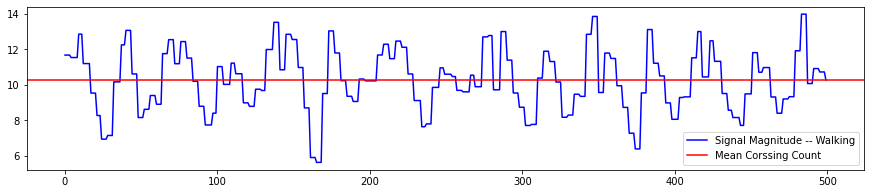

In [16]:
magnitude = ((pd.to_numeric(dataPreprocessingX['accdatax']) ** 2) + 
             (pd.to_numeric(dataPreprocessingY['accdatay']) ** 2) + 
             (pd.to_numeric(dataPreprocessingZ['accdataz']) ** 2))

magnitude = pd.to_numeric(magnitude)**0.5
magnitude = pd.DataFrame(magnitude)
magnitude.rename(columns={0: 'Signal Magnitude -- Walking'}, inplace = True)
magnitude.plot(figsize=(15,3) ,color = 'b')
# math.sqrt(magnitude[0])

plt.axhline(y = magnitude.mean().to_numpy(), color='r', linestyle='-')

plt.legend(['Signal Magnitude -- Walking', 'Mean Corssing Count'])

In [17]:
crossing = magnitude
crossing

,Signal Magnitude -- Walking
0,11.680206
1,11.680206
2,11.680206
3,11.680206
4,11.540356
...,...
495,10.726238
496,10.726238
497,10.726238
498,10.726238


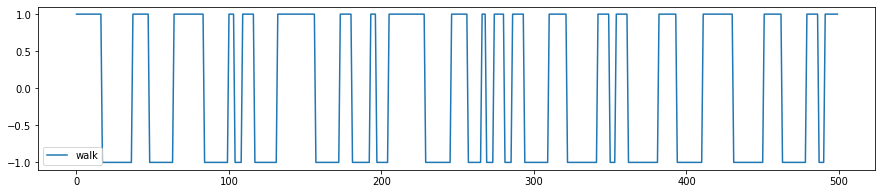

In [18]:
## Mean Crossing Count
result = crossing.ge(crossing.mean().to_numpy())
result.rename(columns={'Signal Magnitude -- Walking': 'walk'}, inplace = True)
result = result["walk"].astype(int)
result = pd.DataFrame(result)

result=result.replace({'walk': {0: -1}}) 
result.plot(figsize=(15,3))

In [19]:
meanCrossingCount = np.where(np.diff(np.sign(result.to_numpy().reshape(-1))))[0]
print(len(meanCrossingCount))

40
